### The project has been done using MovieLens 1M Dataset(ml-1m) and MovieLens 25M Dataset(ml-25m).
### The file 'movies.dat', 'users.dat' and 'ratings.dat' are taken from the MovieLens 1M dataset(ml-1m).
### The file`links.csv' is taken from the MovieLens 25M dataset(ml-25m).

### --------------------------------------------------------------------------------------------------------------------------------------------------------

### MovieLens 1M dataset : Stable benchmark dataset. These files contain 1,000,209 anonymous ratings of approximately 3,900 movies made by 6,040 MovieLens users who joined MovieLens in 2000.

### MovieLens 25M dataset: Stable benchmark dataset. It contains 25000095 ratings and 1093360 tag applications across 62423 movies. These data were created by 162541 users between January 09, 1995 and November 21, 2019. 

### These datasets are publicly available for download at <https://grouplens.org/datasets/movielens/>

### --------------------------------------------------------------------------------------------------------------------------------------------------------

In [1]:
# importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

# Load the movies dataset into memory from MovieLens 1M dataset

In [2]:
movies = pd.read_csv(r'C:\Users\Public\ml-1m\movies.dat', delimiter='::', engine= 'python', header=None, names=['MovieID','Title','Genres'])
movies.head()

,MovieID,Title,Genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [3]:
# # As per the readme file:
    # - Titles are identical to titles provided by the IMDB (including year of release)
    # - Genres are pipe-separated and are selected from the following genres:

        # * Action
        # * Adventure
        # * Animation
        # * Children's
        # * Comedy
        # * Crime
        # * Documentary
        # * Drama
        # * Fantasy
        # * Film-Noir
        # * Horror
        # * Musical
        # * Mystery
        # * Romance
        # * Sci-Fi
        # * Thriller
        # * War
        # * Western

    # - Some MovieIDs do not correspond to a movie due to accidental duplicate entries and/or test entries
    # - Movies are mostly entered by hand, so errors and inconsistencies may exist

## Remove parentheses from the string

In [4]:
def remove_parenthesis(s):   
    return s.str.strip('()')

movies['Year'] = movies['Title'].str.extract('(\(\d{4}\))').apply(remove_parenthesis)

# Transforming the string in the 'Year' column into datetime 'Year' values.
movies['Year'] = pd.to_datetime(movies['Year'] , format='%Y')

movies.head()

,MovieID,Title,Genres,Year
0,1,Toy Story (1995),Animation|Children's|Comedy,1995-01-01
1,2,Jumanji (1995),Adventure|Children's|Fantasy,1995-01-01
2,3,Grumpier Old Men (1995),Comedy|Romance,1995-01-01
3,4,Waiting to Exhale (1995),Comedy|Drama,1995-01-01
4,5,Father of the Bride Part II (1995),Comedy,1995-01-01


# Load the users dataset into memory from MovieLens 1M dataset

In [5]:
users = pd.read_csv(r'C:\Users\Public\ml-1m\users.dat', delimiter='::', engine= 'python', header=None,
                        names=['UserID','Gender','Age','Occupation','Zip-code'])
users.head()

,UserID,Gender,Age,Occupation,Zip-code
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [6]:
# # As per the readme file:
    # - Gender is denoted by a "M" for male and "F" for female
    # - Age is chosen from the following ranges:

        # 1:  "Under 18"
        # 18:  "18-24"
        # 25:  "25-34"
        # 35:  "35-44"
        # 45:  "45-49"
        # 50:  "50-55"
        # 56:  "56+"

    # - Occupation is chosen from the following choices:

        # 0:  "other" or not specified
        # 1:  "academic/educator"
        # 2:  "artist"
        # 3:  "clerical/admin"
        # 4:  "college/grad student"
        # 5:  "customer service"
        # 6:  "doctor/health care"
        # 7:  "executive/managerial"
        # 8:  "farmer"
        # 9:  "homemaker"
        # 10:  "K-12 student"
        # 11:  "lawyer"
        # 12:  "programmer"
        # 13:  "retired"
        # 14:  "sales/marketing"
        # 15:  "scientist"
        # 16:  "self-employed"
        # 17:  "technician/engineer"
        # 18:  "tradesman/craftsman"
        # 19:  "unemployed"
        # 20:  "writer"

# Load the ratings dataset into memory from MovieLens 1M dataset


In [7]:
ratings = pd.read_csv(r'C:\Users\Public\ml-1m\ratings.dat', delimiter='::', engine= 'python', header=None,
                        names=['UserID','MovieID','Rating','Timestamp'])
ratings.head()

,UserID,MovieID,Rating,Timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [8]:
# # As per the readme file:
    # UserIDs range between 1 and 6040 
    # MovieIDs range between 1 and 3952
    # Ratings are made on a 5-star scale (whole-star ratings only)
    # Timestamp is represented in seconds since the epoch as returned by time(2)
# Each user has at least 20 ratings

# Load the links dataset into memory from MovieLens 25M dataset

In [9]:
links = pd.read_csv(r'C:\Users\Public\ml-25m\links.csv' )
links.columns = ['MovieID','imdbID','tmdbID']
links.head()

,MovieID,imdbID,tmdbID
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


In [10]:
# # As per the readme file:
# Identifiers that can be used to link to other sources of movie data are contained in the file `links.csv`. 
# Each line of this file after the header row represents one movie, and has the following format:
    # movieId is an identifier for movies used by <https://movielens.org>. E.g., the movie Toy Story has the link <https://movielens.org/movies/1>.
    # imdbId is an identifier for movies used by <http://www.imdb.com>. E.g., the movie Toy Story has the link <http://www.imdb.com/title/tt0114709/>.
    # tmdbId is an identifier for movies used by <https://www.themoviedb.org>. E.g., the movie Toy Story has the link <https://www.themoviedb.org/movie/862>.

# Queries with movie Titles

## Results that are statically displayed without interaction with user

### Number of movies over the years

In [11]:
# Fetching the total number of movies rated over the years. 

In [12]:
movie_with_year = movies[['Year','Title']].groupby('Year').count()  # count of movies

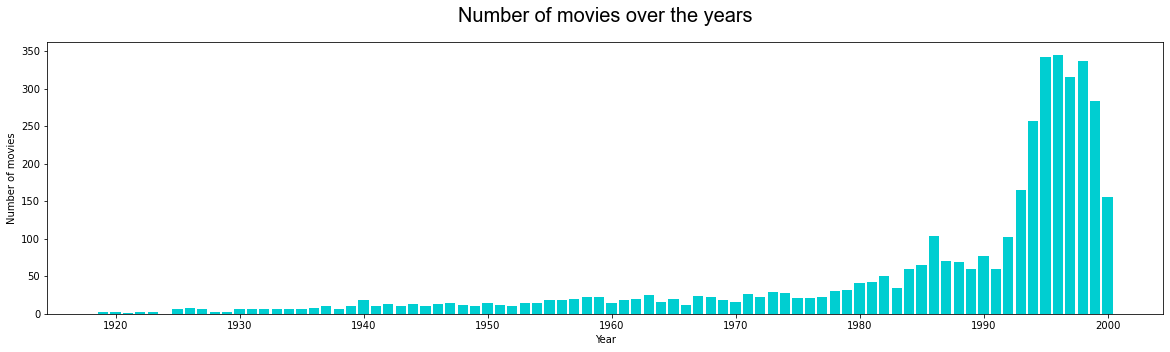

In [13]:
# bar graph showing number of movies over the years
plt.figure(figsize=(20, 5))

plt.bar(movie_with_year.index, movie_with_year['Title'], width=300, color = 'darkturquoise', label=True)
plt.xlabel('Year')
plt.ylabel('Number of movies')
plt.ylim(0,)
plt.title('Number of movies over the years', loc = 'center' , pad = 20 , fontdict={'fontsize':20 ,'color' : 'black',  
                                                                                 'fontfamily' : 'Arial'})
plt.show()

### Display the title and links for each movie ID (Information Integration using both the datasets)

In [14]:
# Fetching the IMDb and TMDb links for each movie title.

In [15]:
# Merge the "movies" and "links" dataframes
merged_movies_links = pd.merge(movies, links, on='MovieID')

# Function to create hyperlinks
def create_imdb_link(imdb_id):
    return f"http://www.imdb.com/title/tt0{imdb_id}"

def create_tmdb_link(tmdb_id):
    return f'https://www.themoviedb.org/movie/{tmdb_id}'

# Create new columns with hyperlinks
merged_movies_links['IMDb Link'] = merged_movies_links['imdbID'].apply(lambda x: create_imdb_link(x))
merged_movies_links['TMDb Link'] = merged_movies_links['tmdbID'].apply(lambda x: create_tmdb_link(x))

# Display the dataframe with hyperlinks
pd.set_option('display.max_colwidth', None)  # Display full content of columns
print("Movie Title and Hyperlinks:")
print(merged_movies_links[['Title', 'IMDb Link', 'TMDb Link']])


Movie Title and Hyperlinks:
                                   Title                            IMDb Link  \
0                       Toy Story (1995)  http://www.imdb.com/title/tt0114709   
1                         Jumanji (1995)  http://www.imdb.com/title/tt0113497   
2                Grumpier Old Men (1995)  http://www.imdb.com/title/tt0113228   
3               Waiting to Exhale (1995)  http://www.imdb.com/title/tt0114885   
4     Father of the Bride Part II (1995)  http://www.imdb.com/title/tt0113041   
...                                  ...                                  ...   
3844             Meet the Parents (2000)  http://www.imdb.com/title/tt0212338   
3845          Requiem for a Dream (2000)  http://www.imdb.com/title/tt0180093   
3846                    Tigerland (2000)  http://www.imdb.com/title/tt0170691   
3847             Two Family House (2000)  http://www.imdb.com/title/tt0202641   
3848               Contender, The (2000)  http://www.imdb.com/title/tt0208874   


### Count the total number of ratings for each Title

In [16]:
# Fetching the count of the total number of ratings for each movie title.

In [17]:
# Merge the ratings and movies dataframes
merged_rating_movies_df = pd.merge(ratings, movies, on='MovieID')
ratings_by_title = merged_rating_movies_df.groupby('Title').size()

# Sort the Series in descending order
ratings_by_title_sorted = ratings_by_title.sort_values(ascending=False)

# # Display the result
ratings_by_title_sorted = pd.DataFrame({
    'Title': ratings_by_title_sorted.index,
    'Total Ratings': ratings_by_title_sorted.values
})
ratings_by_title_sorted.head()

,Title,Total Ratings
0,American Beauty (1999),3428
1,Star Wars: Episode IV - A New Hope (1977),2991
2,Star Wars: Episode V - The Empire Strikes Back (1980),2990
3,Star Wars: Episode VI - Return of the Jedi (1983),2883
4,Jurassic Park (1993),2672


### Ratings for each Title

In [18]:
# Finding the ratings for each movie title.

In [19]:
# Calculate the average ratings for each movie by title
average_ratings_by_title = merged_rating_movies_df.groupby('Title')['Rating'].mean()
min_ratings_by_title = merged_rating_movies_df.groupby('Title')['Rating'].min()
max_ratings_by_title = merged_rating_movies_df.groupby('Title')['Rating'].max()

# Create a new dataframe with the results
ratings_df = pd.DataFrame({
    'Title': average_ratings_by_title.index,
    'Average Rating': average_ratings_by_title.values,
    'Minimum Rating':min_ratings_by_title.values,
    'Maximum Rating':max_ratings_by_title.values
})

# Print or use the resulting dataframe as needed
print("Ratings for Each Movie by Title:")
ratings_df.head(10)

Ratings for Each Movie by Title:


,Title,Average Rating,Minimum Rating,Maximum Rating
0,"$1,000,000 Duck (1971)",3.027027,1,5
1,'Night Mother (1986),3.371429,1,5
2,'Til There Was You (1997),2.692308,1,5
3,"'burbs, The (1989)",2.910891,1,5
4,...And Justice for All (1979),3.713568,1,5
5,1-900 (1994),2.500000,2,3
6,10 Things I Hate About You (1999),3.422857,1,5
7,101 Dalmatians (1961),3.596460,1,5
8,101 Dalmatians (1996),3.046703,1,5
9,12 Angry Men (1957),4.295455,1,5


### Titles which got highest rating based on occupation

In [20]:
# Finding the movie titles which got highest rating based on occupation.

In [21]:
# Map occupation codes to labels
occupation_labels = {
    0: "other or not specified",
    1: "academic/educator",
    2: "artist",
    3: "clerical/admin",
    4: "college/grad student",
    5: "customer service",
    6: "doctor/health care",
    7: "executive/managerial",
    8: "farmer",
    9: "homemaker",
    10: "K-12 student",
    11: "lawyer",
    12: "programmer",
    13: "retired",
    14: "sales/marketing",
    15: "scientist",
    16: "self-employed",
    17: "technician/engineer",
    18: "tradesman/craftsman",
    19: "unemployed",
    20: "writer"
}

merged_df = pd.merge(pd.merge(ratings, users, on='UserID'), movies, on='MovieID')

# Group by Occupation and Movie Titles, calculate the mean rating for each group
avg_ratings_by_occupation_and_title = merged_df.groupby(['Occupation', 'Title'])['Rating'].mean()

# Find the title with the highest average rating in each occupation
highest_rated_titles_by_occupation = avg_ratings_by_occupation_and_title.groupby('Occupation').idxmax()
highest_average_rating_of_titles_by_occupation  =  avg_ratings_by_occupation_and_title.groupby('Occupation').max()

results = []

# Iterate through the occupations and their corresponding highest rated titles and ratings
for (occupation_code, (_, title)), (_, highest_average_rating) in zip(highest_rated_titles_by_occupation.items(), highest_average_rating_of_titles_by_occupation.items()):
    occupation_label = occupation_labels.get(occupation_code)
    
    # Check if rating is numeric before adding to the results
    if pd.notna(highest_average_rating):
        results.append({
            'Occupation Label': occupation_label,
            'Highest Rated Movie Title': title,
            'Highest Average Rating': highest_average_rating
        })

# Create a DataFrame from the results
result_df = pd.DataFrame(results)

# Print the resulting DataFrame
result_df

,Occupation Label,Highest Rated Movie Title,Highest Average Rating
0,other or not specified,All Things Fair (1996),5.0
1,academic/educator,All Over Me (1997),5.0
2,artist,American Pimp (1999),5.0
3,clerical/admin,All Over Me (1997),5.0
4,college/grad student,Aparajito (1956),5.0
5,customer service,"400 Blows, The (Les Quatre cents coups) (1959)",5.0
6,doctor/health care,American Pimp (1999),5.0
7,executive/managerial,24 7: Twenty Four Seven (1997),5.0
8,farmer,"'burbs, The (1989)",5.0
9,homemaker,54 (1998),5.0


### Titles which got lowest rating based on occupation

In [22]:
# Finding the movie titles which got lowest rating based on occupation.

In [23]:
# Group by Occupation and Movie Titles, calculate the mean rating for each group
avg_ratings_by_occupation_and_title = merged_df.groupby(['Occupation', 'Title'])['Rating'].mean()

# Find the title with the lowest average rating in each occupation
lowest_rated_titles_by_occupation = avg_ratings_by_occupation_and_title.groupby('Occupation').idxmin()
lowest_average_rating_of_titles_by_occupation  =  avg_ratings_by_occupation_and_title.groupby('Occupation').min()
  
results = []

# Iterate through the occupations and their corresponding lowest rated titles and ratings
for (occupation_code, (_, title)), (_, lowest_average_rating) in zip(lowest_rated_titles_by_occupation.items(), lowest_average_rating_of_titles_by_occupation.items()):
    occupation_label = occupation_labels.get(occupation_code)
    
    # Check if rating is numeric before adding to the results
    if pd.notna(highest_average_rating):
        results.append({
            'Occupation Label': occupation_label,
            'Highest Rated Movie Title': title,
            'Highest Average Rating': lowest_average_rating
        })

# Create a DataFrame from the results
result_df = pd.DataFrame(results)

# Print the resulting DataFrame
result_df

,Occupation Label,Highest Rated Movie Title,Highest Average Rating
0,other or not specified,Adrenalin: Fear the Rush (1996),1.0
1,academic/educator,"Abominable Snowman, The (1957)",1.0
2,artist,3 Ninjas: High Noon On Mega Mountain (1998),1.0
3,clerical/admin,3 Ninjas: High Noon On Mega Mountain (1998),1.0
4,college/grad student,And the Ship Sails On (E la nave va) (1984),1.0
5,customer service,20 Dates (1998),1.0
6,doctor/health care,24-hour Woman (1998),1.0
7,executive/managerial,Adrenalin: Fear the Rush (1996),1.0
8,farmer,"Adventures of Rocky and Bullwinkle, The (2000)",1.0
9,homemaker,8 Heads in a Duffel Bag (1997),1.0


### Titles which got highest rating based on age

In [24]:
# Finding the titles which got highest rating based on age

In [25]:
age_ranges = {
    1: "Under 18",
    18: "18-24",
    25: "25-34",
    35: "35-44",
    45: "45-49",
    50: "50-55",
    56: "56+"
}

# Group by age and Movie Titles, calculate the mean rating for each group
avg_ratings_by_age_and_title = merged_df.groupby(['Age', 'Title'])['Rating'].mean()

# Find the title with the highest average rating in each age
highest_rated_titles_by_age = avg_ratings_by_age_and_title.groupby('Age').idxmax()
highest_average_rating_of_titles_by_age  =  avg_ratings_by_age_and_title.groupby('Age').max()

results = []

# Iterate through the occupations and their corresponding highest rated titles and ratings
for (age_code, (_, title)), (_, highest_average_rating) in zip(highest_rated_titles_by_age.items(), highest_average_rating_of_titles_by_age.items()):
    age_range = age_ranges.get(age_code)
    
    # Check if rating is numeric before adding to the results
    if pd.notna(highest_average_rating):
        results.append({
            'Age Range': age_range,
            'Highest Rated Movie Title': title,
            'Highest Average Rating': highest_average_rating
        })

# Create a DataFrame from the results
result_df = pd.DataFrame(results)

# Print the resulting DataFrame
result_df

,Age Range,Highest Rated Movie Title,Highest Average Rating
0,Under 18,After Life (1998),5.0
1,18-24,"Actor's Revenge, An (Yukinojo Henge) (1963)",5.0
2,25-34,Ayn Rand: A Sense of Life (1997),5.0
3,35-44,"Apple, The (Sib) (1998)",5.0
4,45-49,"Ballad of Narayama, The (Narayama Bushiko) (1958)",5.0
5,50-55,Across the Sea of Time (1995),5.0
6,56+,About Adam (2000),5.0


### Gender based mean rating for each movie 

In [26]:
# Finding the mean rating for each movie based on gender.

In [27]:
mean_ratings = merged_df.pivot_table('Rating', index='Title', columns=['Gender'], aggfunc='mean')
mean_ratings = pd.merge(movies, mean_ratings, on='Title')
mean_ratings[['Title','Genres','F','M']].sort_values(by='Title',ascending=True)

,Title,Genres,F,M
1850,"$1,000,000 Duck (1971)",Children's|Comedy,3.375000,2.761905
2896,'Night Mother (1986),Drama,3.388889,3.352941
736,'Til There Was You (1997),Drama|Romance,2.675676,2.733333
1891,"'burbs, The (1989)",Comedy,2.793478,2.962085
3188,...And Justice for All (1979),Drama|Thriller,3.828571,3.689024
...,...,...,...,...
3003,"Zed & Two Noughts, A (1985)",Drama,3.500000,3.380952
1666,Zero Effect (1998),Comedy|Thriller,3.864407,3.723140
1266,Zero Kelvin (Kjærlighetens kjøtere) (1995),Action,NaN,3.500000
1322,Zeus and Roxanne (1997),Children's,2.777778,2.357143


### User disagreement - Movies preferred by females but not by males

In [28]:
# Finding the movies preferred by females but not by males.

In [29]:
# female preferred movies
mean_ratings['diff'] = mean_ratings['M'] - mean_ratings['F']
sorted_by_diff = mean_ratings.sort_values(by='diff')
sorted_by_diff[['Title','Genres','F','M','diff']].head(10)

,Title,Genres,F,M,diff
2920,"James Dean Story, The (1957)",Documentary,4.000000,1.000000,-3.000000
660,Country Life (1994),Drama|Romance,5.000000,2.000000,-3.000000
2618,"Spiders, The (Die Spinnen, 1. Teil: Der Goldene See) (1919)",Action|Drama,4.000000,1.000000,-3.000000
734,Babyfever (1994),Comedy|Drama,3.666667,1.000000,-2.666667
3400,"Woman of Paris, A (1923)",Drama,5.000000,2.428571,-2.571429
2572,Cobra (1925),Drama,4.000000,1.500000,-2.500000
3573,"Other Side of Sunday, The (Søndagsengler) (1996)",Comedy|Drama,5.000000,2.928571,-2.071429
2139,Belly (1998),Crime|Drama,5.000000,3.000000,-2.000000
1219,Mad Dog Time (1996),Crime,4.000000,2.000000,-2.000000
1002,For the Moment (1994),Romance|War,5.000000,3.000000,-2.000000


### User disagreement - Movies preferred by males but not by females

In [30]:
# Finding the movies preferred by males but not by females.

In [31]:
# male preferred movies
mean_ratings['diff'] = mean_ratings['F'] - mean_ratings['M']
sorted_by_diff = mean_ratings.sort_values(by='diff')
sorted_by_diff[['Title','Genres','F','M','diff']].head(10)

,Title,Genres,F,M,diff
657,Tigrero: A Film That Was Never Made (1994),Documentary|Drama,1.0,4.333333,-3.333333
133,"Neon Bible, The (1995)",Drama,1.0,4.000000,-3.000000
257,"Enfer, L' (1994)",Drama,1.0,3.750000,-2.750000
722,Stalingrad (1993),War,1.0,3.593750,-2.593750
816,Killer: A Journal of Murder (1995),Crime|Drama,1.0,3.428571,-2.428571
919,Dangerous Ground (1997),Drama,1.0,3.333333,-2.333333
1627,In God's Hands (1998),Action|Drama,1.0,3.333333,-2.333333
2620,Rosie (1998),Drama,1.0,3.333333,-2.333333
2456,"Flying Saucer, The (1950)",Sci-Fi,1.0,3.300000,-2.300000
2025,Jamaica Inn (1939),Drama,1.0,3.142857,-2.142857


## Results that are displayed by interactions with user

### Highest rated movies per UserID

In [32]:
# Finding the highest rated movies based on the UserID entered.

In [34]:
# Get user input 
user_id_input = int(input("Enter UserID: "))
top = int(input("Enter how many: "))

# Merge the data frames to get the relevant information
merged_data = pd.merge(ratings, users, on='UserID')
merged_data = pd.merge(merged_data, movies, on='MovieID')

# Filter data for the given UserID
user_data = merged_data[merged_data['UserID'] == user_id_input]

# Group by movie and calculate the average rating
movie_ratings = user_data.groupby(['MovieID', 'Title']).agg({'Rating': 'mean'}).reset_index()

# Sort by rating in descending order and get the top movies
top_movies = movie_ratings.sort_values(by='Rating', ascending=False).head(top)

# Display the top movies
print(f"\nTop {top} movies rated by UserID {user_id_input}:\n")
print(top_movies[['Title', 'Rating']])

Enter UserID: 1
Enter how many: 5

Top 5 movies rated by UserID 1:

                        Title  Rating
0            Toy Story (1995)       5
17          Cinderella (1950)       5
49          Awakenings (1990)       5
47  Christmas Story, A (1983)       5
40       Bug's Life, A (1998)       5


### Highest rated movies per occupation

In [35]:
# Finding the highest rated movies based on the occupation entered.

In [36]:
occupation_mapping = {
    0: "other",
    1: "academic/educator",
    2: "artist",
    3: "clerical/admin",
    4: "college/grad student",
    5: "customer service",
    6: "doctor/health care",
    7: "executive/managerial",
    8: "farmer",
    9: "homemaker",
    10: "K-12 student",
    11: "lawyer",
    12: "programmer",
    13: "retired",
    14: "sales/marketing",
    15: "scientist",
    16: "self-employed",
    17: "technician/engineer",
    18: "tradesman/craftsman",
    19: "unemployed",
    20: "writer"
}

# Get user input for Occupation
user_occupation = input("Enter Occupation: ").lower()
top = int(input("Enter how many: "))

# Validate user input for occupation
if user_occupation not in occupation_mapping.values():
    print("Invalid occupation entered.")
else:
    # Get the corresponding occupation code
    selected_occupation_code = next(key for key, value in occupation_mapping.items() if value == user_occupation)

    # Merge the data frames to get the relevant information
    merged_df = pd.merge(pd.merge(ratings, users, on='UserID'), movies, on='MovieID')

    # Filter data for the given Occupation
    user_data_by_occupation = merged_df[merged_df['Occupation'] == selected_occupation_code]

    # Group by movie and calculate the average rating
    movie_ratings_by_occupation = user_data_by_occupation.groupby(['MovieID', 'Title']).agg({'Rating': 'mean'}).reset_index()

    # Sort by rating in descending order and get the top movies
    top_movies_by_occupation = movie_ratings_by_occupation.sort_values(by='Rating', ascending=False).head(top)

    # Display the top movies
    print(f"\nTop {top} movies rated by users with occupation '{user_occupation}':\n")
    print(top_movies_by_occupation[['Title', 'Rating']])

Enter Occupation: artist
Enter how many: 5

Top 5 movies rated by users with occupation 'artist':

                                     Title  Rating
2095         Twice Upon a Yesterday (1998)     5.0
1123               Hearts and Minds (1996)     5.0
586   Visitors, The (Les Visiteurs) (1993)     5.0
36         Cry, the Beloved Country (1995)     5.0
2346   Red Sorghum (Hong Gao Liang) (1987)     5.0


### Highest rated movies by gender

In [37]:
# Finding the highest rated movies based on the gender entered.

In [38]:
# Get user input for Gender
user_gender = input("Enter Gender (M/F): ").upper()
top = int(input("Enter how many: "))

# Validate user input for gender
if user_gender not in ['M', 'F']:
    print("Invalid gender entered.")
else:
    # Merge the data frames to get the relevant information
    merged_df = pd.merge(pd.merge(ratings, users, on='UserID'), movies, on='MovieID')

    # Filter data for the given Gender
    user_data_by_gender = merged_df[merged_df['Gender'] == user_gender]

    # Group by movie and calculate the average rating
    movie_ratings_by_gender = user_data_by_gender.groupby(['MovieID', 'Title']).agg({'Rating': 'mean'}).reset_index()

    # Sort by rating in descending order and get the top movies
    top_movies_by_gender = movie_ratings_by_gender.sort_values(by='Rating', ascending=False).head(top)

    # Display the top movies
    print(f"\nTop {top} movies rated by users with gender '{user_gender}':\n")
    print(top_movies_by_gender[['Title', 'Rating']])

Enter Gender (M/F): M
Enter how many: 5

Top 5 movies rated by users with gender 'M':

                                   Title  Rating
737   Gate of Heavenly Peace, The (1995)     5.0
913                 Small Wonders (1996)     5.0
2985                Smashing Time (1967)     5.0
3029                    Baby, The (1973)     5.0
2931             Ulysses (Ulisse) (1954)     5.0


### Highest rated movies by age (age group)

In [39]:
# Finding the highest rated movies based on the age (age group) entered.

In [40]:
# Age ranges mapping
age_ranges = {
    1: "Under 18",
    18: "18-24",
    25: "25-34",
    35: "35-44",
    45: "45-49",
    50: "50-55",
    56: "56+"
}

# Get user input for Age
user_age = int(input("Enter Age: "))
top = int(input("Enter how many: "))

# Automatically map age to the appropriate age range
selected_age_range = max(filter(lambda x: x <= user_age, age_ranges.keys()))

# Merge the data frames to get the relevant information
merged_df = pd.merge(pd.merge(ratings, users, on='UserID'), movies, on='MovieID')

# Filter data for the given Age range
user_data_by_age = merged_df[merged_df['Age'] == selected_age_range]

# Group by movie and calculate the average rating
movie_ratings_by_age = user_data_by_age.groupby(['MovieID', 'Title']).agg({'Rating': 'mean'}).reset_index()

# Sort by rating in descending order and get the top movies
top_movies_by_age = movie_ratings_by_age.sort_values(by='Rating', ascending=False).head(top)

# Display the top movies
print(f"\nTop {top} movies rated by users in the age range {age_ranges[selected_age_range]}:\n")
print(top_movies_by_age[['Title', 'Rating']])

Enter Age: 20
Enter how many: 5

Top 5 movies rated by users in the age range 18-24:

                                                   Title  Rating
1874                                  Modulations (1998)     5.0
1213  Message to Love: The Isle of Wight Festival (1996)     5.0
3327                            Bittersweet Motel (2000)     5.0
1889                             Rich and Strange (1932)     5.0
2620                            Under the Rainbow (1981)     5.0


### Keyword based search for all movies having the specified keyword and relevant movie information

In [41]:
# Searching for a relevant movie information based on a keyword or movie title entered. 

In [42]:
# Merge the "movies" and "links" dataframes
merged_movies_links = pd.merge(pd.merge(movies, links, on='MovieID'), ratings, on='MovieID')

# Function to create hyperlinks
def create_imdb_link(imdb_id):
    return f"http://www.imdb.com/title/tt0{imdb_id}"

def create_tmdb_link(tmdb_id):
    return f'https://www.themoviedb.org/movie/{tmdb_id}'

# Create new columns with hyperlinks
merged_movies_links['IMDb Link'] = merged_movies_links['imdbID'].apply(lambda x: create_imdb_link(x))
merged_movies_links['TMDb Link'] = merged_movies_links['tmdbID'].apply(lambda x: create_tmdb_link(x))

# Display the dataframe with hyperlinks
pd.set_option('display.max_colwidth', None)  # Display full content of columns
print("Movie Title and Hyperlinks:")
# print(merged_movies_links)
mean_ratings_by_movie = merged_movies_links.groupby(['MovieID', 'Title', 'IMDb Link', 'TMDb Link']).agg({'Rating': 'mean'}).reset_index()

# Get user input for Genre
user_movie = input("Enter keyword: ")

# Filter data for the given Genre
movie_data = mean_ratings_by_movie[mean_ratings_by_movie['Title'].str.contains(user_movie)]
movie_data.set_index('Title', inplace=True)
# movie_data
print(movie_data)

Movie Title and Hyperlinks:
Enter keyword: Christmas
                                        MovieID  \
Title                                             
Nightmare Before Christmas, The (1993)      551   
Christmas Carol, A (1938)                  1099   
Muppet Christmas Carol, The (1992)         2083   
One Magic Christmas (1985)                 2086   
I'll Be Home For Christmas (1998)          2339   
Christmas Vacation (1989)                  2423   
Christmas Story, A (1983)                  2804   
White Christmas (1954)                     3675   

                                                                  IMDb Link  \
Title                                                                         
Nightmare Before Christmas, The (1993)  http://www.imdb.com/title/tt0107688   
Christmas Carol, A (1938)                http://www.imdb.com/title/tt029992   
Muppet Christmas Carol, The (1992)      http://www.imdb.com/title/tt0104940   
One Magic Christmas (1985)               

# Queries with Genres

## Results that are statically displayed without interaction with user

### Number of Movies per Genre

In [43]:
# Finding the number of movies per genre.

In [44]:
# Using the copy method
movies_df = movies.copy()

# Split the genres into a list
movies_df['Genres'] = movies_df['Genres'].str.split('|')

# Explode the list of genres into separate rows
exploded_movies = movies_df.explode('Genres')

# Count the number of movies per genre
movies_per_genre = exploded_movies['Genres'].value_counts()

# Create a new dataframe with the results
movies_per_genre_df = pd.DataFrame({
    'Genre': movies_per_genre.index,
    'Number of Movies': movies_per_genre.values
})

# Print or use the resulting dataframe as needed
print("Number of Movies per Genre:")
print(movies_per_genre_df)

Number of Movies per Genre:
          Genre  Number of Movies
0         Drama              1603
1        Comedy              1200
2        Action               503
3      Thriller               492
4       Romance               471
5        Horror               343
6     Adventure               283
7        Sci-Fi               276
8    Children's               251
9         Crime               211
10          War               143
11  Documentary               127
12      Musical               114
13      Mystery               106
14    Animation               105
15      Western                68
16      Fantasy                68
17    Film-Noir                44


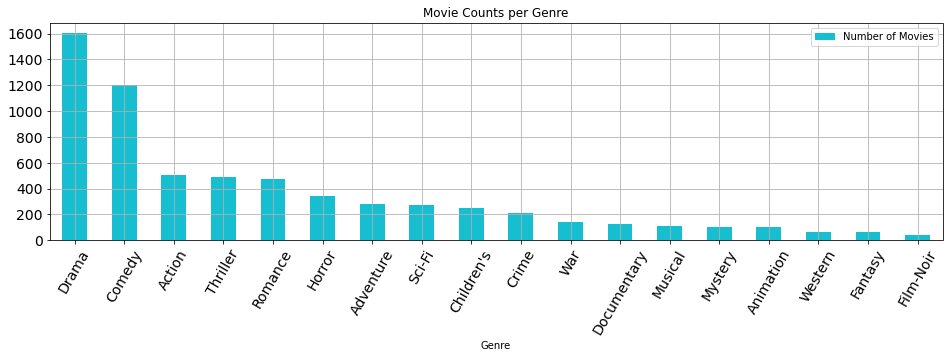

In [45]:
bar_genres = movies_per_genre_df.plot.bar(x='Genre' , rot = 60, figsize = (16,4), grid = True, 
                         colormap = 'tab10_r',
                         title='Movie Counts per Genre',
                         fontsize = 14,  )

### Genres which got highest rating by Males

In [46]:
# Finding the genres which got highest rating by males.

In [47]:
# Merge the dataframes ratings, users and movies to create a unified dataframe
merged_df = pd.merge(pd.merge(ratings, users, on='UserID'), movies, on='MovieID')

# Split the genres into a list
merged_df['Genres'] = merged_df['Genres'].str.split('|')

# Explode the list of genres into separate rows
exploded_df = merged_df.explode('Genres')

# Filter rows where Gender is male
male_ratings = exploded_df[exploded_df['Gender'] == 'M']

# Convert the "Rating" column to a numeric type, setting errors='coerce' to handle non-numeric values
male_ratings['Rating'] = pd.to_numeric(male_ratings['Rating'], errors='coerce')

# Group by Genres and calculate the mean rating for each genre
avg_ratings_by_genre = male_ratings.groupby('Genres')['Rating'].mean().reset_index()

# Find the top 3 genres with the highest average rating by males
top_genres_by_male = avg_ratings_by_genre.sort_values(by='Rating', ascending=False).head(3)

# Print the results
print("\nTop 3 genres with the highest average rating by males:")
for index, row in top_genres_by_male.iterrows():
    print(f"Genre: {row['Genres']} with a rating of {row['Rating']}")


Top 3 genres with the highest average rating by males:
Genre: Film-Noir with a rating of 4.092254072124618
Genre: Documentary with a rating of 3.9288107202680065
Genre: War with a rating of 3.8933754638644964


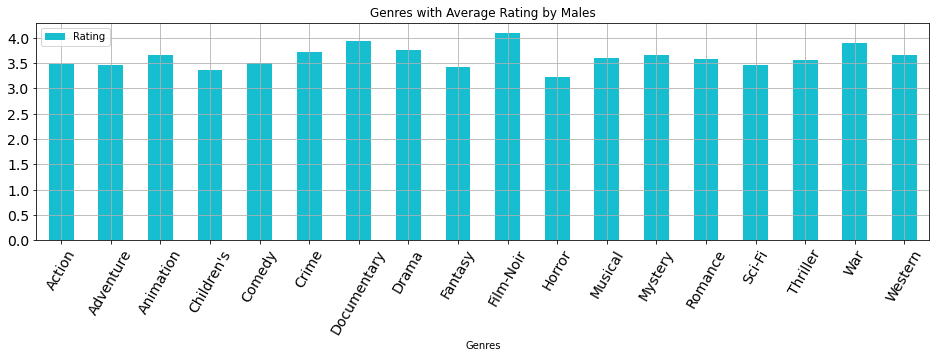

In [48]:
# graph for average rating per genre by males
avg_rating_genres_males = avg_ratings_by_genre.plot.bar(x='Genres', y='Rating' , rot = 60, figsize = (16,4), grid = True, 
                         colormap = 'tab10_r',
                         title='Genres with Average Rating by Males',
                         fontsize = 14,  )

### Genres which got highest rating by Females

In [49]:
# Finding the genres which got highest rating by females.

In [50]:
# Filter rows where Gender is Female
female_ratings = exploded_df[exploded_df['Gender'] == 'F']

# Convert the "Rating" column to a numeric type, setting errors='coerce' to handle non-numeric values
female_ratings['Rating'] = pd.to_numeric(female_ratings['Rating'], errors='coerce')

# Group by Genres and calculate the mean rating for each genre
avg_ratings_by_genre = female_ratings.groupby('Genres')['Rating'].mean().reset_index()

# Find the top 3 genres with the highest average rating by females
top_genres_by_female = avg_ratings_by_genre.sort_values(by='Rating', ascending=False).head(3)

# Print the results
print("\nTop 3 genres with the highest average rating by females:")
for index, row in top_genres_by_female.iterrows():
    print(f"Genre: {row['Genres']} with a rating of {row['Rating']}")


Top 3 genres with the highest average rating by females:
Genre: Film-Noir with a rating of 4.018086625416468
Genre: Documentary with a rating of 3.94639175257732
Genre: War with a rating of 3.893138437522174


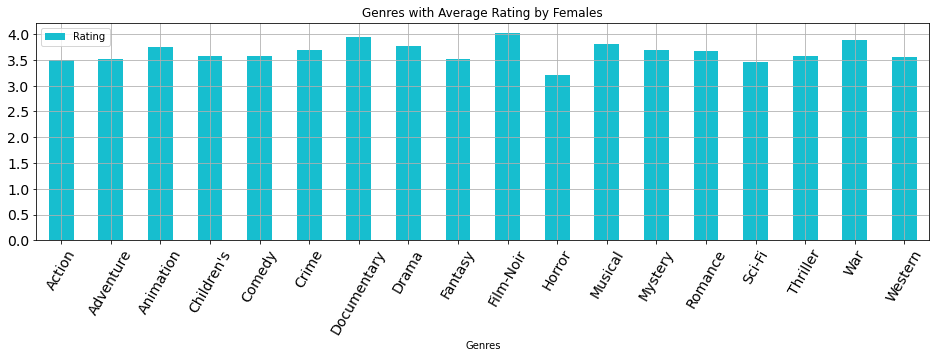

In [51]:
# graph for average rating per genre by females
avg_rating_genres_females = avg_ratings_by_genre.plot.bar(x='Genres', y='Rating' , rot = 60, figsize = (16,4), grid = True, 
                         colormap = 'tab10_r',
                         title='Genres with Average Rating by Females',
                         fontsize = 14,  )

### Genres which got highest rating by ages groups

In [52]:
# Finding the top 3 genres which got highest rating by ages groups.

In [53]:
import pandas as pd

# Assuming you have a DataFrame named 'exploded_df' with 'Age' and 'Genres' columns

age_ranges = {
    1: "Under 18",
    18: "18-24",
    25: "25-34",
    35: "35-44",
    45: "45-49",
    50: "50-55",
    56: "56+"
}

# Create a new column for AgeGroup based on the age ranges
exploded_df['AgeGroup'] = pd.cut(exploded_df['Age'], bins=list(age_ranges.keys()) + [100], labels=list(age_ranges.values()), right=False)

# Convert the "Rating" column to a numeric type, setting errors='coerce' to handle non-numeric values
exploded_df['Rating'] = pd.to_numeric(exploded_df['Rating'], errors='coerce')

# Group by AgeGroup and Genres, calculate the mean rating for each group
avg_ratings_by_age_group = exploded_df.groupby(['AgeGroup', 'Genres'])['Rating'].mean().reset_index()

# Find the top 3 genres with the highest average rating in each age group
top_genres_by_age_group = avg_ratings_by_age_group.sort_values(by='Rating', ascending=False).groupby('AgeGroup').head(3)

# Print the results
for age_group, genre_row in top_genres_by_age_group.groupby('AgeGroup'):
    print(f"\nTop 3 genres with the highest average rating for age group {age_group}:")
    for index, row in genre_row.iterrows():
        print(f"Genre: {row['Genres']} with a rating of {row['Rating']}")


Top 3 genres with the highest average rating for age group Under 18:
Genre: Film-Noir with a rating of 4.1454545454545455
Genre: War with a rating of 3.8954372623574143
Genre: Drama with a rating of 3.7947347320593345

Top 3 genres with the highest average rating for age group 18-24:
Genre: Film-Noir with a rating of 3.9973684210526317
Genre: Documentary with a rating of 3.86586493987049
Genre: War with a rating of 3.853135920544418

Top 3 genres with the highest average rating for age group 25-34:
Genre: Film-Noir with a rating of 4.058724575623184
Genre: Documentary with a rating of 3.946689595872743
Genre: War with a rating of 3.8412404349577125

Top 3 genres with the highest average rating for age group 35-44:
Genre: Film-Noir with a rating of 4.0649101796407185
Genre: Documentary with a rating of 3.9537470725995316
Genre: War with a rating of 3.901129943502825

Top 3 genres with the highest average rating for age group 45-49:
Genre: Film-Noir with a rating of 4.105376344086022
Ge

### Genres which got highest rating based on occupation


In [54]:
# Finding the top 3 genres which got highest rating based on occupation.

In [55]:
# Map occupation codes to labels
occupation_labels = {
    0: "other or not specified",
    1: "academic/educator",
    2: "artist",
    3: "clerical/admin",
    4: "college/grad student",
    5: "customer service",
    6: "doctor/health care",
    7: "executive/managerial",
    8: "farmer",
    9: "homemaker",
    10: "K-12 student",
    11: "lawyer",
    12: "programmer",
    13: "retired",
    14: "sales/marketing",
    15: "scientist",
    16: "self-employed",
    17: "technician/engineer",
    18: "tradesman/craftsman",
    19: "unemployed",
    20: "writer"
}

# Convert the "Rating" column to a numeric type, setting errors='coerce' to handle non-numeric values
exploded_df['Rating'] = pd.to_numeric(exploded_df['Rating'], errors='coerce')

# Group by Occupation and Genres, calculate the mean rating for each group
avg_ratings_by_occupation = exploded_df.groupby(['Occupation', 'Genres'])['Rating'].mean().reset_index()

# Find the top 3 genres with the highest average rating in each occupation
top_genres_by_occupation = avg_ratings_by_occupation.sort_values(by='Rating', ascending=False).groupby('Occupation').head(3)

# Print the results
for occupation_code, genre_row in top_genres_by_occupation.groupby('Occupation'):
    occupation_label = occupation_labels.get(occupation_code)
    print(f"\nTop 3 genres with the highest average rating for occupation {occupation_label}:")
    for index, row in genre_row.iterrows():
        print(f"Genre: {row['Genres']} with a rating of {row['Rating']}")


Top 3 genres with the highest average rating for occupation other or not specified:
Genre: Film-Noir with a rating of 4.058154787931788
Genre: Documentary with a rating of 3.8545454545454545
Genre: War with a rating of 3.8523344191096633

Top 3 genres with the highest average rating for occupation academic/educator:
Genre: Film-Noir with a rating of 4.082613390928726
Genre: Documentary with a rating of 3.9848866498740554
Genre: War with a rating of 3.882950382950383

Top 3 genres with the highest average rating for occupation artist:
Genre: Film-Noir with a rating of 4.114
Genre: Documentary with a rating of 4.028933092224231
Genre: War with a rating of 3.859375

Top 3 genres with the highest average rating for occupation clerical/admin:
Genre: Film-Noir with a rating of 4.07533234859675
Genre: War with a rating of 3.9276923076923076
Genre: Musical with a rating of 3.857048748353096

Top 3 genres with the highest average rating for occupation college/grad student:
Genre: Film-Noir wit

### Total and average ratings per genre

In [56]:
# Finding the total and average ratings per genre.

In [57]:
# Calculate the percentage of ratings for each genre
ratings_count_per_genre = exploded_df['Genres'].value_counts()
average_ratings_per_genre = exploded_df.groupby('Genres')['Rating'].mean()

total_ratings = len(exploded_df)
percentage_ratings_per_genre = (ratings_count_per_genre / total_ratings) * 100

# Create a DataFrame with the results
genre_ratings_df = pd.DataFrame({
    'Genre': percentage_ratings_per_genre.index,
    'Total number of ratings per genre': ratings_count_per_genre.values,
    'Percentage of ratings given to that genre': percentage_ratings_per_genre.values,
    'Average rating per genre': average_ratings_per_genre.values
})

# Print the result
print("Ratings information per Genre:")
genre_ratings_df

Ratings information per Genre:


,Genre,Total number of ratings per genre,Percentage of ratings given to that genre,Average rating per genre
0,Comedy,356580,16.965337,3.491185
1,Drama,354529,16.867755,3.477257
2,Action,257457,12.249270,3.684868
3,Thriller,189680,9.024581,3.422035
4,Sci-Fi,157294,7.483722,3.522099
5,Romance,147523,7.018838,3.708679
6,Adventure,133953,6.373206,3.933123
7,Crime,79541,3.784396,3.766332
8,Horror,76386,3.634288,3.447371
9,Children's,72186,3.434460,4.075188


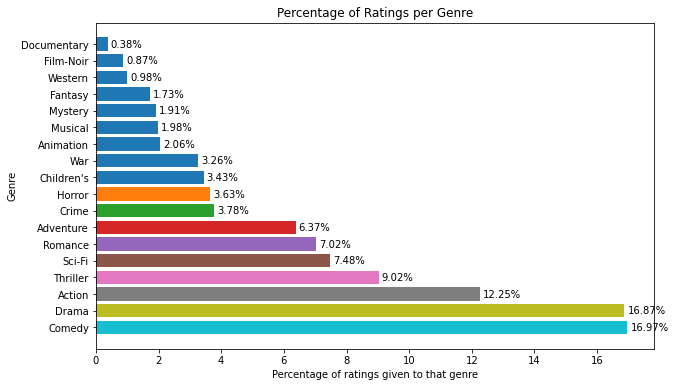

In [58]:
genre_ratings_df_sorted = genre_ratings_df.sort_values(by='Percentage of ratings given to that genre', ascending=False)

# Plot a horizontal bar chart
fig, ax = plt.subplots(figsize=(10, 6))
colors = plt.cm.tab10_r(range(len(genre_ratings_df_sorted)))
# colors = plt.cm.get_cmap('tab10_r', len(genre_ratings_df_sorted))

ax.barh(genre_ratings_df_sorted['Genre'], genre_ratings_df_sorted['Percentage of ratings given to that genre'],
        color=colors)

# Add labels and title
ax.set_xlabel('Percentage of ratings given to that genre')
ax.set_ylabel('Genre')
ax.set_title('Percentage of Ratings per Genre')

# Display the percentage values on the bars
for index, value in enumerate(genre_ratings_df_sorted['Percentage of ratings given to that genre']):
    ax.text(value + 0.1, index, f'{value:.2f}%', va='center')

# Show the plot
plt.show()

(0.0, 5.0)

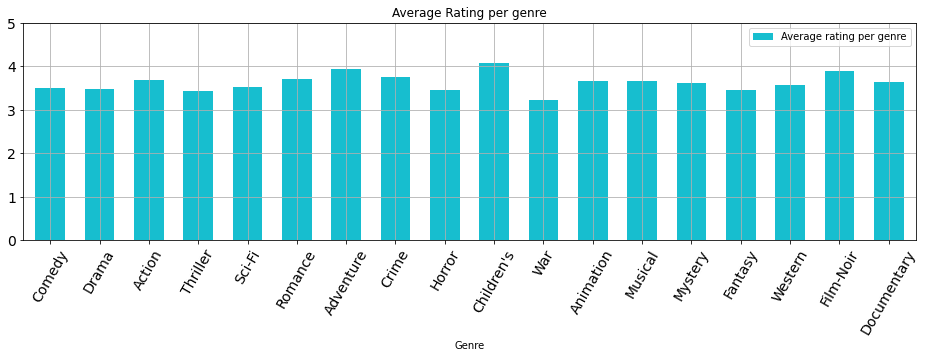

In [59]:
bar_genres_rating_count = genre_ratings_df.plot.bar(x='Genre' , y = 'Average rating per genre',rot = 60, figsize = (16,4),
                            grid = True, colormap = 'tab10_r', width=0.6, title='Average Rating per genre', fontsize = 14)
bar_genres_rating_count.set_ylim([0, 5])

### Ratings for Musical Genre movies

In [60]:
# Finding the ratings for musical genre movies.

In [61]:
# Filter rows with the Musical genre
musical_ratings = exploded_df[exploded_df['Genres'] == 'Musical']

# Group by title and calculate the average rating
Musical_average_ratings_by_title = musical_ratings.groupby('Title')['Rating'].mean()
Musical_average_ratings_by_title = pd.DataFrame({'Title': Musical_average_ratings_by_title.index,
                                                'Rating': Musical_average_ratings_by_title.values})
# Print the result
print("Average Ratings for Musical Genre Movies by Title:")
Musical_average_ratings_by_title.head()
# print(Musical_average_ratings_by_title)

Average Ratings for Musical Genre Movies by Title:


,Title,Rating
0,Aladdin (1992),3.788305
1,Alice in Wonderland (1951),3.697143
2,All Dogs Go to Heaven 2 (1996),2.080000
3,All That Jazz (1979),3.823344
4,American Pop (1981),3.071429


In [62]:
# Sort the results by average rating in descending order
sorted_ratings = Musical_average_ratings_by_title.sort_values(by ='Rating',ascending=False)

# Print the sorted result
print("Average Ratings for Musical Genre Movies by Title (Sorted):")
sorted_ratings.head()

Average Ratings for Musical Genre Movies by Title (Sorted):


,Title,Rating
90,Singin' in the Rain (1952),4.283622
111,"Wizard of Oz, The (1939)",4.247963
101,This Is Spinal Tap (1984),4.179785
89,Shall We Dance? (1937),4.165714
70,My Fair Lady (1964),4.154088


### Ratings for Musical Genre by gender

In [63]:
# Finding the ratings for musical genre based on gender.

In [64]:
# Group by gender and calculate the average rating
average_ratings_by_gender = musical_ratings.groupby('Gender')['Rating'].mean()

# Print the result
print("Average Ratings for Musical Genre by Gender:")
print(average_ratings_by_gender)

Average Ratings for Musical Genre by Gender:
Gender
F    3.809108
M    3.596332
Name: Rating, dtype: float64


### Ratings for Musical Genre by age


In [65]:
# Finding the ratings for musical genre based on age.

In [66]:
age_ranges = {
    1: "Under 18",
    18: "18-24",
    25: "25-34",
    35: "35-44",
    45: "45-49",
    50: "50-55",
    56: "56+"
}

# Map the age column to age ranges
musical_ratings['Age'] = musical_ratings['Age'].map(age_ranges)

# Group by age and calculate the average rating
average_ratings_by_age = musical_ratings.groupby('Age')['Rating'].mean()

# Print the result
print("Average Ratings for Musical Genre by age:")
print(average_ratings_by_age)

Average Ratings for Musical Genre by age:
Age
18-24       3.560291
25-34       3.619857
35-44       3.721587
45-49       3.744484
50-55       3.798254
56+         3.886713
Under 18    3.568306
Name: Rating, dtype: float64


### Ratings for Musical Genre by occupation

In [67]:
# Finding the ratings for musical genre based on occupation.

In [68]:
# Map occupation codes to labels
occupation_labels = {
    0: "other or not specified",
    1: "academic/educator",
    2: "artist",
    3: "clerical/admin",
    4: "college/grad student",
    5: "customer service",
    6: "doctor/health care",
    7: "executive/managerial",
    8: "farmer",
    9: "homemaker",
    10: "K-12 student",
    11: "lawyer",
    12: "programmer",
    13: "retired",
    14: "sales/marketing",
    15: "scientist",
    16: "self-employed",
    17: "technician/engineer",
    18: "tradesman/craftsman",
    19: "unemployed",
    20: "writer"
}

# Map the occupation code column to occupation labels
musical_ratings['Occupation'] = musical_ratings['Occupation'].map(occupation_labels)

# Group by occupation and calculate the average rating
average_ratings_by_occupation = musical_ratings.groupby('Occupation')['Rating'].mean()

# Print the result
print("Average Ratings for Musical Genre by Occupation:")
print(average_ratings_by_occupation.sort_values(ascending=False))


Average Ratings for Musical Genre by Occupation:
Occupation
clerical/admin            3.857049
homemaker                 3.845821
scientist                 3.805987
retired                   3.736486
sales/marketing           3.733026
lawyer                    3.710526
academic/educator         3.701586
self-employed             3.678006
writer                    3.669849
executive/managerial      3.665550
technician/engineer       3.659684
other or not specified    3.657419
doctor/health care        3.650061
college/grad student      3.642227
customer service          3.641892
artist                    3.613322
programmer                3.598214
farmer                    3.560000
K-12 student              3.556738
tradesman/craftsman       3.475949
unemployed                3.360771
Name: Rating, dtype: float64


### Links to Musical Genre movies (using the Information Integration done earlier)

In [69]:
# Fetching the IMDb and TMDb links to musical genre movies.

In [70]:
# Filter rows with the Musical genre
musical_movies = merged_movies_links[merged_movies_links['Genres'].str.contains('Musical')]

# # Display the dataframe with hyperlinks
print(musical_movies[['Title', 'IMDb Link', 'TMDb Link']])

                            Title                            IMDb Link  \
22893           Pocahontas (1995)  http://www.imdb.com/title/tt0114148   
22894           Pocahontas (1995)  http://www.imdb.com/title/tt0114148   
22895           Pocahontas (1995)  http://www.imdb.com/title/tt0114148   
22896           Pocahontas (1995)  http://www.imdb.com/title/tt0114148   
22897           Pocahontas (1995)  http://www.imdb.com/title/tt0114148   
...                           ...                                  ...   
991275  Dancer in the Dark (2000)  http://www.imdb.com/title/tt0168629   
991276  Dancer in the Dark (2000)  http://www.imdb.com/title/tt0168629   
991277  Dancer in the Dark (2000)  http://www.imdb.com/title/tt0168629   
991278  Dancer in the Dark (2000)  http://www.imdb.com/title/tt0168629   
991279  Dancer in the Dark (2000)  http://www.imdb.com/title/tt0168629   

                                       TMDb Link  
22893   https://www.themoviedb.org/movie/10530.0  
22894   h

## Results that are displayed by interactions with user

### Top genres based on average of ratings given by any particular user

In [71]:
# Finding the genres based on average of ratings given by any particular user.

In [72]:
# Get user input for UserID
user_id_input = int(input("Enter UserID: "))
top = int(input("Enter how many: "))

# Merge the data frames to get the relevant information
merged_df = pd.merge(pd.merge(ratings, users, on='UserID'), movies, on='MovieID')

# Split genres into individual genres and explode them
merged_df['Genres'] = merged_df['Genres'].str.split('|')
merged_df = merged_df.explode('Genres')

# Filter data for the given UserID
merged_df = merged_df[merged_df['UserID'] == user_id_input]

# Group by genre and calculate the average rating
genre_ratings = merged_df.groupby('Genres').agg({'Rating': 'mean'}).reset_index()

# Sort by rating in descending order and get the top genres
top_genres = genre_ratings.sort_values(by='Rating', ascending=False).head(top)

# Display the top genres
print(f"\nTop {top} genres rated by UserID {user_id_input}:\n")
print(top_genres[['Genres', 'Rating']])

Enter UserID: 1
Enter how many: 5

Top 5 genres rated by UserID 1:

        Genres    Rating
12         War  5.000000
6        Drama  4.428571
10      Sci-Fi  4.333333
8      Musical  4.285714
3   Children's  4.250000


### Top genres based on average of ratings by age (age group)

In [73]:
# Finding the genres based on average of ratings by age (age group).

In [74]:
# Age ranges mapping
age_ranges = {
    1: "Under 18",
    18: "18-24",
    25: "25-34",
    35: "35-44",
    45: "45-49",
    50: "50-55",
    56: "56+"
}

# Get user input for Age
user_age = int(input("Enter Age: "))
top = int(input("Enter how many: "))

# Automatically map age to the appropriate age range
selected_age_range = max(filter(lambda x: x <= user_age, age_ranges.keys()))

# Merge the data frames to get the relevant information
merged_df = pd.merge(pd.merge(ratings, users, on='UserID'), movies, on='MovieID')

# Filter data for the given Age range
user_data_by_age = merged_df[merged_df['Age'] == selected_age_range]

# Split genres into individual genres and explode them
user_data_by_age['Genres'] = user_data_by_age['Genres'].str.split('|')
user_data_by_age = user_data_by_age.explode('Genres')

# Group by genre and calculate the average rating
genre_ratings_by_age = user_data_by_age.groupby('Genres').agg({'Rating': 'mean'}).reset_index()

# Sort by rating in descending order and get the top genres
top_genres_by_age = genre_ratings_by_age.sort_values(by='Rating', ascending=False).head(top)

# Display the top genres
print(f"\nTop genres rated by users in the age range {age_ranges[selected_age_range]}:\n")
print(top_genres_by_age[['Genres', 'Rating']])

Enter Age: 20
Enter how many: 5

Top genres rated by users in the age range 18-24:

         Genres    Rating
9     Film-Noir  3.997368
6   Documentary  3.865865
16          War  3.853136
7         Drama  3.721930
5         Crime  3.668054


### Top genres based on average of ratings given an occupation

In [75]:
# Finding the genres based on average of ratings given an occupation.

In [76]:
# Occupation mapping
occupation_mapping = {
    "other": 0,
    "academic/educator": 1,
    "artist": 2,
    "clerical/admin": 3,
    "college/grad student": 4,
    "customer service": 5,
    "doctor/health care": 6,
    "executive/managerial": 7,
    "farmer": 8,
    "homemaker": 9,
    "K-12 student": 10,
    "lawyer": 11,
    "programmer": 12,
    "retired": 13,
    "sales/marketing": 14,
    "scientist": 15,
    "self-employed": 16,
    "technician/engineer": 17,
    "tradesman/craftsman": 18,
    "unemployed": 19,
    "writer": 20
}

# Get user input for Occupation
user_occupation = input("Enter Occupation: ").lower()
top = int(input("Enter how many: "))

# Automatically map occupation to the appropriate occupation code
selected_occupation_code = occupation_mapping.get(user_occupation, None)

if selected_occupation_code is None:
    print("Invalid occupation entered.")
else:
    # Merge the data frames to get the relevant information
    merged_df = pd.merge(pd.merge(ratings, users, on='UserID'), movies, on='MovieID')

    # Filter data for the given Occupation
    user_data_by_occupation = merged_df[merged_df['Occupation'] == selected_occupation_code]

    # Split genres into individual genres and explode them
    user_data_by_occupation['Genres'] = user_data_by_occupation['Genres'].str.split('|')
    user_data_by_occupation = user_data_by_occupation.explode('Genres')

    # Group by genre and calculate the average rating
    genre_ratings_by_occupation = user_data_by_occupation.groupby('Genres').agg({'Rating': 'mean'}).reset_index()

    # Sort by rating in descending order and get the top genres
    top_genres_by_occupation = genre_ratings_by_occupation.sort_values(by='Rating', ascending=False).head(top)

    # Display the top genres
    print(f"\nTop genres rated by users with occupation '{user_occupation}':\n")
    print(top_genres_by_occupation[['Genres', 'Rating']])

Enter Occupation: artist
Enter how many: 5

Top genres rated by users with occupation 'artist':

         Genres    Rating
9     Film-Noir  4.114000
6   Documentary  4.028933
16          War  3.859375
7         Drama  3.732216
12      Mystery  3.719645


###  Top genres based on average of ratings given a gender

In [77]:
# Finding the genres based on average of ratings given a gender.

In [78]:
# Get user input for Gender
user_gender = input("Enter Gender (M/F): ").upper()
top = int(input("Enter how many: "))

# Validate user input for gender
if user_gender not in ['M', 'F']:
    print("Invalid gender entered.")
else:
    # Merge the data frames to get the relevant information
    merged_df = pd.merge(pd.merge(ratings, users, on='UserID'), movies, on='MovieID')

    # Filter data for the given Gender
    user_data_by_gender = merged_df[merged_df['Gender'] == user_gender]

    # Split genres into individual genres and explode them
    user_data_by_gender['Genres'] = user_data_by_gender['Genres'].str.split('|')
    user_data_by_gender = user_data_by_gender.explode('Genres')

    # Group by genre and calculate the average rating
    genre_ratings_by_gender = user_data_by_gender.groupby('Genres').agg({'Rating': 'mean'}).reset_index()

    # Sort by rating in descending order and get the top genres
    top_genres_by_gender = genre_ratings_by_gender.sort_values(by='Rating', ascending=False).head(top)

    # Display the top genres
    print(f"\nTop genres rated by users with gender '{user_gender}':\n")
    print(top_genres_by_gender[['Genres', 'Rating']])

Enter Gender (M/F): M
Enter how many: 5

Top genres rated by users with gender 'M':

         Genres    Rating
9     Film-Noir  4.092254
6   Documentary  3.928811
16          War  3.893375
7         Drama  3.766589
5         Crime  3.713720


### Top movies based on average of ratings given a genre

In [79]:
# Finding the movies based on average of ratings given a genre.

In [80]:
# Get user input for Genre
user_genre = input("Enter Genre: ")
top = int(input("Enter how many: "))

# Merge the data frames to get the relevant information
merged_df = pd.merge(pd.merge(ratings, users, on='UserID'), movies, on='MovieID')

# Filter data for the given Genre
user_data_by_genre = merged_df[merged_df['Genres'].str.contains(user_genre)]

# Group by movie and calculate the average rating
movie_ratings_by_genre = user_data_by_genre.groupby(['MovieID', 'Title']).agg({'Rating': 'mean'}).reset_index()

# Sort by rating in descending order and get the top movies
top_movies_by_genre = movie_ratings_by_genre.sort_values(by='Rating', ascending=False).head(top)

# Display the top movies
print(f"\nTop {top} movies in the genre '{user_genre}':\n")
print(top_movies_by_genre[['Title', 'Rating']])

Enter Genre: Comedy
Enter how many: 5

Top 5 movies in the genre 'Comedy':

                           Title    Rating
934         Smashing Time (1967)  5.000000
499      Follow the Bitch (1998)  5.000000
1061    One Little Indian (1973)  5.000000
230        Close Shave, A (1995)  4.520548
328   Wrong Trousers, The (1993)  4.507937


# Queries with Users

## Results that are statically displayed without interaction with user

### Overall average rating of movies by female users

In [81]:
# Finding the overall average rating of movies by female users.

In [82]:
# Merge the ratings and users dataframes
merged_rating_user_df = pd.merge(ratings, users, on='UserID')

# Filter rows where Gender is Female
female_ratings = merged_rating_user_df[merged_rating_user_df['Gender'] == 'F']

# Calculate the average rating by female users
average_rating_female = female_ratings['Rating'].mean()

print(f"The average rating by female users is: {average_rating_female:.2f}")

The average rating by female users is: 3.62


### Overall average rating of movies by male users

In [83]:
# Finding the overall average rating of movies by male users.

In [84]:
# Filter rows where Gender is Female
male_ratings = merged_rating_user_df[merged_rating_user_df['Gender'] == 'M']

# Calculate the average rating by female users
average_rating_male = male_ratings['Rating'].mean()

print(f"The average rating by male users is: {average_rating_male:.2f}")

The average rating by male users is: 3.57


The average rating  irrespective of genre is approximately same whether the user is male or female.

### Minimum, Maximum and Average rating for all users

In [85]:
# Finding the minimum, maximum and average rating for all users.

In [86]:
average_ratings_by_user = ratings.groupby('UserID')['Rating'].mean()
min_ratings_by_user = ratings.groupby('UserID')['Rating'].min()
max_ratings_by_user = ratings.groupby('UserID')['Rating'].max()


# Create a new dataframe with the results
ratings_by_user_df = pd.DataFrame({
    'UserID': average_ratings_by_user.index,
    'Average Rating': average_ratings_by_user.values,
    'Minimum Rating': min_ratings_by_user.values,
    'Maximum Rating': max_ratings_by_user.values
})

# Print or use the resulting dataframe as needed
print("Ratings given by each UserID:")
ratings_by_user_df.head()

Ratings given by each UserID:


,UserID,Average Rating,Minimum Rating,Maximum Rating
0,1,4.188679,3,5
1,2,3.713178,1,5
2,3,3.901961,1,5
3,4,4.190476,1,5
4,5,3.146465,1,5


### Average rating of all genres given by each user

In [87]:
# Finding the average rating of all genres given by each user.

In [88]:
# Merge the ratings and movies dataframes
merged_rating_movies_df = pd.merge(ratings, movies, on='MovieID')

# Split the genres into a list
merged_rating_movies_df['Genres'] = merged_rating_movies_df['Genres'].str.split('|')

# Explode the list of genres into separate rows
exploded_df = merged_rating_movies_df.explode('Genres')

# Create a pivot table
pivot_table = pd.pivot_table(exploded_df, values='Rating', index='UserID', columns='Genres', aggfunc='mean')

# Print or use the resulting pivot table as needed
print("Genres as Columns with Ratings for Each UserID:")
pivot_table

Genres as Columns with Ratings for Each UserID:


Genres,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
UserID,,,,,,,,,,,,,,,,,,
1,4.200000,4.000000,4.111111,4.250000,4.142857,4.000000,NaN,4.428571,4.00,NaN,NaN,4.285714,NaN,3.666667,4.333333,3.666667,5.000000,NaN
2,3.500000,3.736842,NaN,NaN,3.560000,3.583333,NaN,3.898734,3.00,4.000000,3.000000,NaN,3.333333,3.708333,3.588235,3.483871,3.733333,4.333333
3,3.956522,4.000000,4.000000,4.000000,3.766667,NaN,NaN,4.000000,4.50,NaN,2.666667,4.000000,3.000000,3.800000,3.833333,3.800000,4.000000,4.666667
4,4.157895,3.833333,NaN,4.000000,NaN,5.000000,NaN,4.166667,4.50,NaN,4.333333,NaN,NaN,4.000000,3.555556,3.500000,3.333333,4.500000
5,2.612903,3.000000,4.000000,3.833333,3.410714,3.285714,3.666667,3.096154,NaN,4.000000,2.800000,3.333333,3.125000,3.100000,3.066667,2.846154,3.500000,4.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6036,3.000000,2.987952,3.911765,3.444444,3.203065,3.528302,3.909091,3.505376,3.00,4.058824,2.986486,3.709677,3.411765,3.352459,2.834320,3.142857,3.785714,3.642857
6037,3.642857,4.000000,4.000000,3.666667,3.576271,3.833333,4.000000,3.877551,4.25,3.444444,4.111111,4.000000,3.692308,3.681818,3.692308,3.705882,4.000000,3.750000
6038,3.000000,4.000000,3.666667,3.000000,3.833333,NaN,NaN,3.888889,NaN,NaN,2.500000,NaN,NaN,4.166667,4.000000,NaN,4.000000,NaN


### Total number of ratings per genre given by each user

In [89]:
# Finding the total number of ratings per genre given by each user.

In [90]:
# Create a pivot table with count of ratings
pivot_table_count = pd.pivot_table(exploded_df, values='Rating', index='UserID', columns='Genres', aggfunc='count', fill_value=0)

# Print or use the resulting pivot table as needed
print("Genres as Columns with Count of Ratings for Each UserID:")
pivot_table_count

Genres as Columns with Count of Ratings for Each UserID:


Genres,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
UserID,,,,,,,,,,,,,,,,,,
1,5,5,18,20,14,2,0,21,3,0,0,14,0,6,3,3,2,0
2,56,19,0,0,25,12,0,79,1,1,2,0,3,24,17,31,15,3
3,23,25,3,3,30,0,0,8,2,0,3,1,1,5,6,5,2,6
4,19,6,0,1,0,1,0,6,2,0,3,0,0,2,9,4,3,2
5,31,9,4,6,56,21,6,104,0,3,10,3,8,30,15,39,6,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6036,154,83,34,54,261,53,11,372,19,17,74,31,34,122,169,147,42,14
6037,28,9,1,6,59,18,1,98,4,9,9,4,13,22,39,68,16,4
6038,2,1,3,1,12,0,0,9,0,0,2,0,0,6,1,0,4,0


Here, UserID 6040 has done 42 action, 22 Adventure,102 comedy and 185 drama movies.
This means that this user is an authentic user and has seen a good number of movies

# GUI

In [91]:
import tkinter as tk
from tkinter import messagebox, scrolledtext
import webbrowser


pd.set_option("display.max_rows", None)
pd.set_option('max_columns', None)

def open_link(link):
    webbrowser.open_new_tab(link)
        
# Function to display movie title and links for each movie ID
def display_movie_links():
    
    # Merge the "movies" and "links" dataframes
    merged_movies_links = pd.merge(movies, links, on='MovieID')

    # Function to create hyperlinks
    def create_imdb_link(imdb_id):
        return f"http://www.imdb.com/title/tt0{imdb_id}"

    def create_tmdb_link(tmdb_id):
        return f'https://www.themoviedb.org/movie/{tmdb_id}'

    # Create new columns with hyperlinks
    merged_movies_links['IMDb Link'] = merged_movies_links['imdbID'].apply(lambda x: create_imdb_link(x))
    merged_movies_links['TMDb Link'] = merged_movies_links['tmdbID'].apply(lambda x: create_tmdb_link(x))

    # Create a scrolled text widget
    scrolled_text.delete(1.0, tk.END)  # Clear previous content
    for index, row in merged_movies_links.iterrows():
        imdb_link = row['IMDb Link']
        tmdb_link = row['TMDb Link']
        link_label = f"\n{row['Title']}\n"
        link1_label = f"IMDb: {imdb_link}\n"
        link2_label = f"TMDb: {tmdb_link}\n"
         # Insert content into the scrolled text widget
        scrolled_text.insert(tk.END, link_label)
        
        # Use window_create to insert clickable labels into the scrolled text
        link1_label_widget = tk.Label(scrolled_text, text=link1_label, fg="blue", cursor="hand2")
        link1_label_widget.bind("<Button-1>", lambda event, imdb_link=imdb_link: open_link(imdb_link))
        scrolled_text.window_create(tk.END, window=link1_label_widget)
        
        link2_label_widget = tk.Label(scrolled_text, text=link2_label, fg="blue", cursor="hand2")
        link2_label_widget.bind("<Button-1>", lambda event, tmdb_link=tmdb_link: open_link(tmdb_link))
        scrolled_text.window_create(tk.END, window=link2_label_widget)


# Function to display average rating by female users
def display_average_rating_female():
    # Merge the ratings and users dataframes
    merged_rating_user_df = pd.merge(ratings, users, on='UserID')

    # Filter rows where Gender is Female
    female_ratings = merged_rating_user_df[merged_rating_user_df['Gender'] == 'F']

    # Calculate the average rating by female users
    average_rating_female = female_ratings['Rating'].mean()

    scrolled_text.insert(tk.END, average_rating_female)

# Function to display average rating by male users
def display_average_rating_male():
    # Merge the ratings and users dataframes
    merged_rating_user_df = pd.merge(ratings, users, on='UserID')

    # Filter rows where Gender is Male
    male_ratings = merged_rating_user_df[merged_rating_user_df['Gender'] == 'M']

    # Calculate the average rating by male users
    average_rating_male = male_ratings['Rating'].mean()

    scrolled_text.insert(tk.END, average_rating_male)
    
def count_total_rating_movie():
    merged_rating_movies_df = pd.merge(ratings, movies, on='MovieID')
    ratings_by_title = merged_rating_movies_df.groupby('Title').size()

    # Sort the Series in descending order
    ratings_by_title_sorted = ratings_by_title.sort_values(ascending=False)

    # # Display the result
    ratings_by_title_sorted = pd.DataFrame({
        'Title': ratings_by_title_sorted.index,
        'Total Ratings': ratings_by_title_sorted.values
    })
    scrolled_text.insert(tk.END, ratings_by_title_sorted)
    
def average_rating_movie():  
    merged_rating_movies_df = pd.merge(ratings, movies, on='MovieID')
    # Calculate the average ratings for each movie by title
    average_ratings_by_title = merged_rating_movies_df.groupby('Title')['Rating'].mean()

    # Create a new dataframe with the results
    average_ratings_df = pd.DataFrame({
        'Title': average_ratings_by_title.index,
        'Average Rating': average_ratings_by_title.values
    })
    # Print or use the resulting dataframe as needed
    scrolled_text.insert(tk.END, average_ratings_df)
    
def count_movies_per_genre():
    # Using the copy method
    movies_df = movies.copy()

    # Split the genres into a list
    movies_df['Genres'] = movies_df['Genres'].str.split('|')

    # Explode the list of genres into separate rows
    exploded_movies = movies_df.explode('Genres')

    # Count the number of movies per genre
    movies_per_genre = exploded_movies['Genres'].value_counts()

    # Create a new dataframe with the results
    movies_per_genre_df = pd.DataFrame({
        'Genre': movies_per_genre.index,
        'Number of Movies': movies_per_genre.values
    })

    scrolled_text.insert(tk.END, movies_per_genre_df)

def genre_with_highest_ratings_male():
    # Merge the dataframes ratings, users and movies to create a unified dataframe
    merged_df = pd.merge(pd.merge(ratings, users, on='UserID'), movies, on='MovieID')

    # Split the genres into a list
    merged_df['Genres'] = merged_df['Genres'].str.split('|')

    # Explode the list of genres into separate rows
    exploded_df = merged_df.explode('Genres')

    # Filter rows where Gender is Male
    male_ratings = exploded_df[exploded_df['Gender'] == 'M']

    # Group by Genres and calculate the mean rating for each genre
    avg_ratings_by_genre = male_ratings.groupby('Genres')['Rating'].mean()


    # Find the genre with the highest average rating
    highest_rated_genre = avg_ratings_by_genre.idxmax()
    highest_average_rating = avg_ratings_by_genre.max()
    
    a = "The genre with the highest average rating by males is: " + highest_rated_genre
    b = " and the rating is: " + str(highest_average_rating)
    
    scrolled_text.insert(tk.END,a)
    scrolled_text.insert(tk.END, b)
    
def genre_with_highest_ratings_female():
    # Merge the dataframes ratings, users and movies to create a unified dataframe
    merged_df = pd.merge(pd.merge(ratings, users, on='UserID'), movies, on='MovieID')

    # Split the genres into a list
    merged_df['Genres'] = merged_df['Genres'].str.split('|')

    # Explode the list of genres into separate rows
    exploded_df = merged_df.explode('Genres')

    # Filter rows where Gender is Male
    female_ratings = exploded_df[exploded_df['Gender'] == 'F']

    # Group by Genres and calculate the mean rating for each genre
    avg_ratings_by_genre = female_ratings.groupby('Genres')['Rating'].mean()


    # Find the genre with the highest average rating
    highest_rated_genre = avg_ratings_by_genre.idxmax()
    highest_average_rating = avg_ratings_by_genre.max()
    
    a = "The genre with the highest average rating by females is: " + highest_rated_genre
    b = " and the rating is: " + str(highest_average_rating)
    
    scrolled_text.insert(tk.END, a)
    scrolled_text.insert(tk.END, b)
    
def highest_rating_genres_by_age():
    age_ranges = {
        1: "Under 18",
        18: "18-24",
        25: "25-34",
        35: "35-44",
        45: "45-49",
        50: "50-55",
        56: "56+"
    }
    # Merge the dataframes ratings, users and movies to create a unified dataframe
    merged_df = pd.merge(pd.merge(ratings, users, on='UserID'), movies, on='MovieID')

    # Split the genres into a list
    merged_df['Genres'] = merged_df['Genres'].str.split('|')

    # Explode the list of genres into separate rows
    exploded_df = merged_df.explode('Genres')

    # Create a new column for AgeGroup based on the age ranges
    exploded_df['AgeGroup'] = pd.cut(exploded_df['Age'], bins=list(age_ranges.keys()) + [100], labels=list(age_ranges.values()), right=False)

    # Convert the "Rating" column to a numeric type, setting errors='coerce' to handle non-numeric values
    exploded_df['Rating'] = pd.to_numeric(exploded_df['Rating'], errors='coerce')

    # Group by AgeGroup and Genres, calculate the mean rating for each group
    avg_ratings_by_age_group = exploded_df.groupby(['AgeGroup', 'Genres'])['Rating'].mean()

    # Find the genre with the highest average rating in each age group
    highest_rated_genres_by_age_group = avg_ratings_by_age_group.groupby('AgeGroup').idxmax()
    highest_average_rating_of_genres_by_age_group = avg_ratings_by_age_group.groupby('AgeGroup').max()


    # Print the results
    for (age_group, (_, genre)), (_, highest_average_rating) in zip(highest_rated_genres_by_age_group.items(), highest_average_rating_of_genres_by_age_group.items()):
        # Check if rating is numeric before formatting
        if pd.notna(highest_average_rating):
            a = "\n The genre with the highest average rating for age group " + str(age_group)+ " is " + str(genre) +" with a rating of " +str(highest_average_rating)
            scrolled_text.insert(tk.END,a)
        else:
            b = "No valid ratings for age group" +str(age_group)
            scrolled_text.insert(tk.END, b)

def highest_rating_genres_by_occupation(): 
    # Map occupation codes to labels
    occupation_labels = {
        0: "other or not specified",
        1: "academic/educator",
        2: "artist",
        3: "clerical/admin",
        4: "college/grad student",
        5: "customer service",
        6: "doctor/health care",
        7: "executive/managerial",
        8: "farmer",
        9: "homemaker",
        10: "K-12 student",
        11: "lawyer",
        12: "programmer",
        13: "retired",
        14: "sales/marketing",
        15: "scientist",
        16: "self-employed",
        17: "technician/engineer",
        18: "tradesman/craftsman",
        19: "unemployed",
        20: "writer"
    }
    # Merge the dataframes ratings, users and movies to create a unified dataframe
    merged_df = pd.merge(pd.merge(ratings, users, on='UserID'), movies, on='MovieID')

    # Split the genres into a list
    merged_df['Genres'] = merged_df['Genres'].str.split('|')

    # Explode the list of genres into separate rows
    exploded_df = merged_df.explode('Genres')

    # Group by Occupation and Genres, calculate the mean rating for each group
    avg_ratings_by_occupation = exploded_df.groupby(['Occupation', 'Genres'])['Rating'].mean()

    # Find the genre with the highest average rating in each occupation
    highest_rated_genres_by_occupation = avg_ratings_by_occupation.groupby('Occupation').idxmax()
    highest_average_rating_of_genres_by_occupation = avg_ratings_by_occupation.groupby('Occupation').max()

    # Print the results
    for (occupation_code, (_, genre)), (_, highest_average_rating) in zip(highest_rated_genres_by_occupation.items(), highest_average_rating_of_genres_by_occupation.items()):
        occupation_label = occupation_labels.get(occupation_code)
        # Check if rating is numeric before formatting
        if pd.notna(highest_average_rating):
            a = "\n The genre with the highest average rating for occupation " + str(occupation_label)+ " is " + str(genre) +" with a rating of " +str(highest_average_rating)
            scrolled_text.insert(tk.END,a)
        else:
            b = "No valid ratings for occupation" +str(occupation_label)
            scrolled_text.insert(tk.END, b)
            
def Ratings_Musical_Genre():
    # Filter rows with the Musical genre
    merged_df = pd.merge(pd.merge(ratings, users, on='UserID'), movies, on='MovieID')

    # Split the genres into a list
    merged_df['Genres'] = merged_df['Genres'].str.split('|')

    # Explode the list of genres into separate rows
    exploded_df = merged_df.explode('Genres')
    musical_ratings = exploded_df[exploded_df['Genres'] == 'Musical']

    # Group by title and calculate the average rating
    Musical_average_ratings_by_title = musical_ratings.groupby('Title')['Rating'].mean()
    Musical_average_ratings_by_title = pd.DataFrame({'Title': Musical_average_ratings_by_title.index,
                                                    'Rating': Musical_average_ratings_by_title.values})
    # Print the result
    scrolled_text.insert(tk.END, Musical_average_ratings_by_title)
    
def Ratings_Musical_Genre_by_gender():
    merged_df = pd.merge(pd.merge(ratings, users, on='UserID'), movies, on='MovieID')

    # Split the genres into a list
    merged_df['Genres'] = merged_df['Genres'].str.split('|')

    # Explode the list of genres into separate rows
    exploded_df = merged_df.explode('Genres')
    # Filter rows with the Musical genre
    musical_ratings = exploded_df[exploded_df['Genres'] == 'Musical']
    # Group by gender and calculate the average rating
    average_ratings_by_gender = musical_ratings.groupby('Gender')['Rating'].mean()

    # Print the result
    scrolled_text.insert(tk.END, average_ratings_by_gender)
    
def Ratings_Musical_Genre_by_age():
    merged_df = pd.merge(pd.merge(ratings, users, on='UserID'), movies, on='MovieID')

    # Split the genres into a list
    merged_df['Genres'] = merged_df['Genres'].str.split('|')

    # Explode the list of genres into separate rows
    exploded_df = merged_df.explode('Genres')
    # Filter rows with the Musical genre
    musical_ratings = exploded_df[exploded_df['Genres'] == 'Musical']
    # Group by age and calculate the average rating
    average_ratings_by_age = musical_ratings.groupby('Age')['Rating'].mean()

    # Print the result
    scrolled_text.insert(tk.END, average_ratings_by_age)
    
def Links_Musical_Genre_movies():
    
    # Merge the "movies" and "links" dataframes
    merged_movies_links = pd.merge(movies, links, on='MovieID')
    
    # Filter rows with the Musical genre
    merged_movies_links = merged_movies_links[merged_movies_links['Genres'].str.contains('Musical')]

    # Function to create hyperlinks
    def create_imdb_link(imdb_id):
        return f"http://www.imdb.com/title/tt0{imdb_id}"

    def create_tmdb_link(tmdb_id):
        return f'https://www.themoviedb.org/movie/{tmdb_id}'

    # Create new columns with hyperlinks
    merged_movies_links['IMDb Link'] = merged_movies_links['imdbID'].apply(lambda x: create_imdb_link(x))
    merged_movies_links['TMDb Link'] = merged_movies_links['tmdbID'].apply(lambda x: create_tmdb_link(x))

    # Create a scrolled text widget
    scrolled_text.delete(1.0, tk.END)  # Clear previous content
    for index, row in merged_movies_links.iterrows():
        imdb_link = row['IMDb Link']
        tmdb_link = row['TMDb Link']
        link_label = f"\n{row['Title']}\n"
        link1_label = f"IMDb: {imdb_link}\n"
        link2_label = f"TMDb: {tmdb_link}\n"
        
        # Insert content into the scrolled text widget
        scrolled_text.insert(tk.END, link_label)
        
        # Use window_create to insert clickable labels into the scrolled text
        link1_label_widget = tk.Label(scrolled_text, text=link1_label, fg="blue", cursor="hand2")
        link1_label_widget.bind("<Button-1>", lambda event, imdb_link=imdb_link: open_link(imdb_link))
        scrolled_text.window_create(tk.END, window=link1_label_widget)
        
        link2_label_widget = tk.Label(scrolled_text, text=link2_label, fg="blue", cursor="hand2")
        link2_label_widget.bind("<Button-1>", lambda event, tmdb_link=tmdb_link: open_link(tmdb_link))
        scrolled_text.window_create(tk.END, window=link2_label_widget)


# Function to handle button click
def handle_button_click():
    choice = int(choice_var.get())
    scrolled_text.delete(1.0, tk.END)  # Clear previous content
    if choice == 1:
        display_movie_links()
    elif choice == 2:
        display_average_rating_female()
    elif choice == 3:
        display_average_rating_male()
    elif choice == 4:
        count_total_rating_movie()
    elif choice == 5:
        average_rating_movie()
    elif choice == 6:
        count_movies_per_genre()
    elif choice == 7:
        genre_with_highest_ratings_male()
    elif choice == 8:
        genre_with_highest_ratings_female()
    elif choice == 9:
        highest_rating_genres_by_age()
    elif choice == 10:
        highest_rating_genres_by_occupation()
    elif choice == 11:
        Ratings_Musical_Genre()
    elif choice == 12:
        Ratings_Musical_Genre_by_gender()
    elif choice == 13:
        Ratings_Musical_Genre_by_age()
    elif choice == 14:
        Links_Musical_Genre_movies()
    else:
        messagebox.showinfo("Invalid Choice", "Please enter a valid choice")

# Create the main window
root = tk.Tk()
root.title("GUI")

# Create frames
left_frame = tk.Frame(root)
right_frame = tk.Frame(root)

# Place frames in the window
left_frame.pack(side="left")
right_frame.pack(side="right", fill="both", expand=True)

choice_label1 = tk.Label(left_frame, text="GUI using MovieLens 1M \n and \n MovieLens 25M Datasets", font=("Arial", 20))
choice_label1.pack(pady=100)

# Create and place widgets in the left frame
choice_label = tk.Label(left_frame, text="Enter your choice:" , font=("Arial", 15))
choice_label.pack(pady=10)

choice_var = tk.StringVar()
choice_entry = tk.Entry(left_frame, textvariable=choice_var)
choice_entry.pack(pady=10)

choice1_label = tk.Label(left_frame, text="1: Display movie title and links for each movie ID" , font=("Arial", 12))
choice1_label.pack()

choice2_label = tk.Label(left_frame, text="2: Display average rating by female users", font=("Arial", 12))
choice2_label.pack()

choice3_label = tk.Label(left_frame, text="3: Display average rating by male users", font=("Arial", 12))
choice3_label.pack()

choice4_label = tk.Label(left_frame, text="4: Count total rating for each movie", font=("Arial", 12))
choice4_label.pack()

choice5_label = tk.Label(left_frame, text="5: Average rating for each movie", font=("Arial", 12))
choice5_label.pack()

choice6_label = tk.Label(left_frame, text="6: Number of movies per genre", font=("Arial", 12))
choice6_label.pack()

choice7_label = tk.Label(left_frame, text="7: Genres which got highest rating by Males", font=("Arial", 12))
choice7_label.pack()

choice8_label = tk.Label(left_frame, text="8: Genres which got highest rating by Females", font=("Arial", 12))
choice8_label.pack()

choice9_label = tk.Label(left_frame, text="9: Genres which got highest rating by age", font=("Arial", 12))
choice9_label.pack()

choice10_label = tk.Label(left_frame, text="10: Genres which got highest rating by occupation", font=("Arial", 12))
choice10_label.pack()

choice11_label = tk.Label(left_frame, text="11: Ratings for Musical Genre movies", font=("Arial", 12))
choice11_label.pack()

choice12_label = tk.Label(left_frame, text="12: Ratings for Musical Genre by gender", font=("Arial", 12))
choice12_label.pack()

choice13_label = tk.Label(left_frame, text="13: Ratings for Musical Genre by age", font=("Arial", 12))
choice13_label.pack()

choice14_label = tk.Label(left_frame, text="14: Links for Musical Genre movies", font=("Arial", 12))
choice14_label.pack()

button = tk.Button(left_frame, text="Submit", command=handle_button_click, font=("Arial", 15))
button.pack(pady=10)

# Create and place a scrolled text widget in the right frame
scrolled_text = scrolledtext.ScrolledText(right_frame, wrap=tk.WORD, width=100, height=20)
scrolled_text.pack(fill="both", expand=True)

result_text = tk.StringVar()
result_label = tk.Label(right_frame, textvariable=result_text, justify="left")
result_label.pack()

# Run the main loop
root.mainloop()